ValueError for Logistic Regression: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)
--- Decision Tree ---
Accuracy: 0.8571
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7

ValueError for SVM: The number of classes has to be greater than one; got 1 class
--- Random Forest ---
Accuracy: 0.8571
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79     

c:\Users\mvang\Capstone_Project\final_project2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mvang\Capstone_Project\final_project2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mvang\Capstone_Project\final_project2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

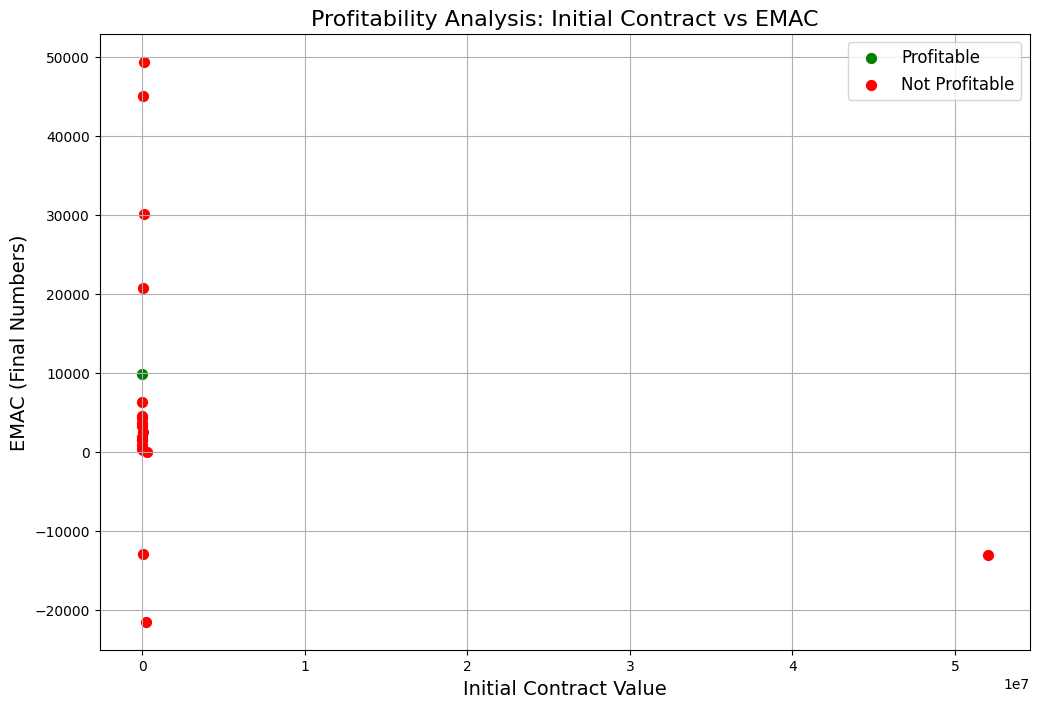

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
df = pd.read_csv('2024oppts.csv')

# Data Cleaning and Preparation
df = df.dropna(subset=['init_contract', 'emac', 'job_status'])
completed_jobs = df[df['job_status'] == 'COMPLETE'].copy()
completed_jobs['profit'] = completed_jobs['emac'] - completed_jobs['init_contract']
completed_jobs['is_profitable'] = completed_jobs['profit'].apply(lambda x: 1 if x > 0 else 0)

# Select features and target variable
X = completed_jobs[['init_contract', 'emac']]
y = completed_jobs['is_profitable']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model Training and Evaluation ---
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    try:
        # Train the model
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        results[name] = {'accuracy': accuracy, 'report': report}

        print(f"--- {name} ---")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Classification Report:\n{report}")

    except ValueError as e:
        print(f"ValueError for {name}: {e}")

# --- Plotting ---
plt.figure(figsize=(12, 8))

# Scatter plot for profitable projects
profitable = completed_jobs[completed_jobs['is_profitable'] == 1]
plt.scatter(profitable['init_contract'], profitable['emac'], color='green', label='Profitable', s=50)

# Scatter plot for non-profitable projects
non_profitable = completed_jobs[completed_jobs['is_profitable'] == 0]
plt.scatter(non_profitable['init_contract'], non_profitable['emac'], color='red', label='Not Profitable', s=50)

plt.xlabel('Initial Contract Value', fontsize=14)
plt.ylabel('EMAC (Final Numbers)', fontsize=14)
plt.title('Profitability Analysis: Initial Contract vs EMAC', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
